# Type of problem


This is a Binary classification problem. Our two classesa re "yes" denoting that the customer subscribed to a term deposit, and "no" denoting that the customer did not subscribe

# What are the performance metrics being used ?

The performance metric that I am going to use is AUC ROC score also known as AUROC ( Area under the reciever Operating Characteristics)

## Why AUC?
The reason we are choosing AUC over accuracy is because,as we will see in Exploratory data analysis, the dataset we are working with is an imbalanced dataset with the class “no” being the majority class. 
If we use accuracy as our metric, any random model can give us a very good accuracy. But at the end, it will be a random model. AUC gets over this problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. 
Accuracy does not guarantee that.

### Import necessary Libraries for EDA 

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read the dataset

In [95]:
data = pd.read_csv("Casestudy Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  36040 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [96]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37444.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,36040.000000,41188.000000,41188.000000,41188.000000
mean,39.999947,258.285010,2.567593,962.475454,0.172963,0.081886,93.575575,-40.502600,3.621291,5167.035911
std,10.414908,259.279249,2.770014,186.910907,0.494901,1.570960,0.579216,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [97]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


#### Getting the value counts of certain columns

In [98]:
print(data["job"].value_counts())
print("*" * 50)
print(data["marital"].value_counts())
print("*" * 50)
print(data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
**************************************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
**************************************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


### Getting the value counts of the independent varaible

In [99]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


##### As we can see here from the distribution the data is severly imbalanced the number of "no"s are 8 times the number of "y"s

# EDA
### Plot the distribution of class variables

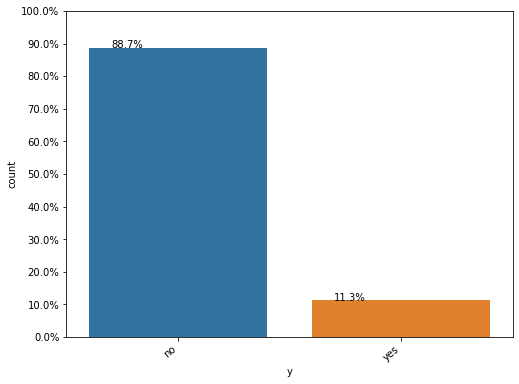

In [100]:
plt.figure(figsize=(8,6))
Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

# Univariate Analysis

In [101]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

In [102]:
%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

# Feature : job

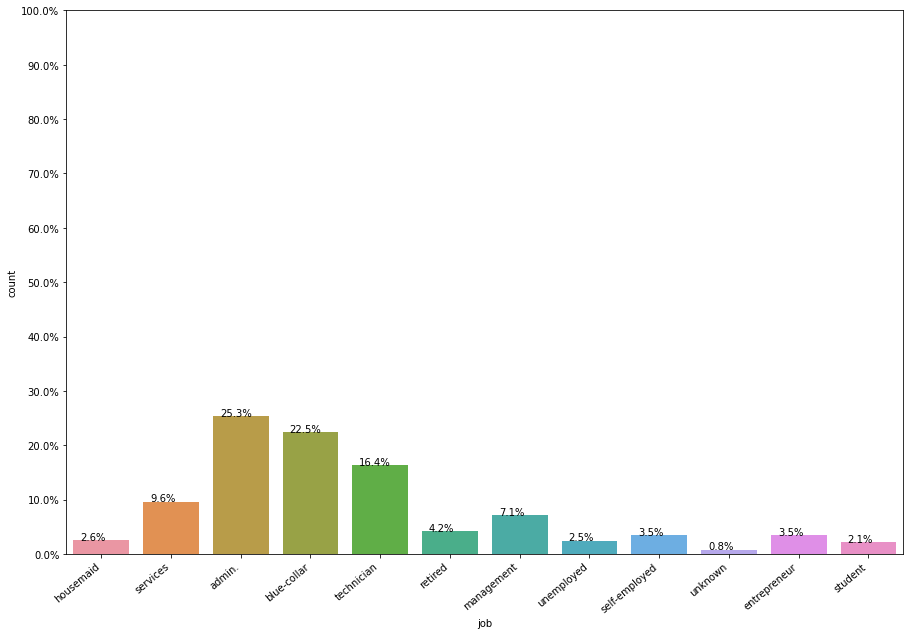

In [103]:
countplot("job", data)

 From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

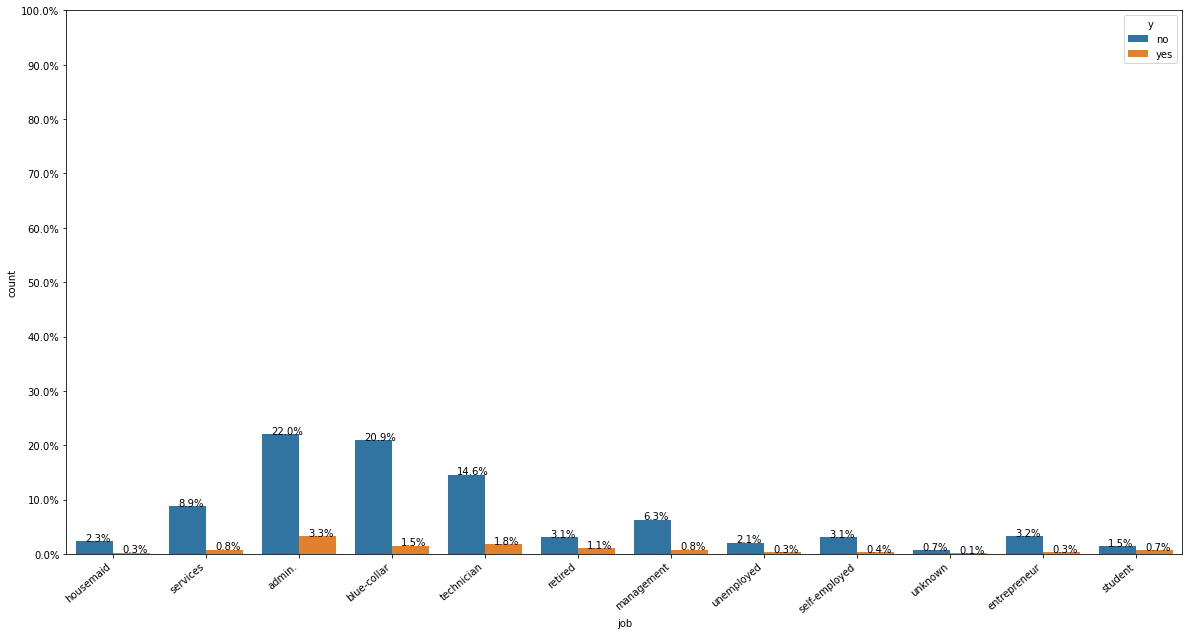

In [104]:
countplot_withY("job", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.

# Feature : Marital

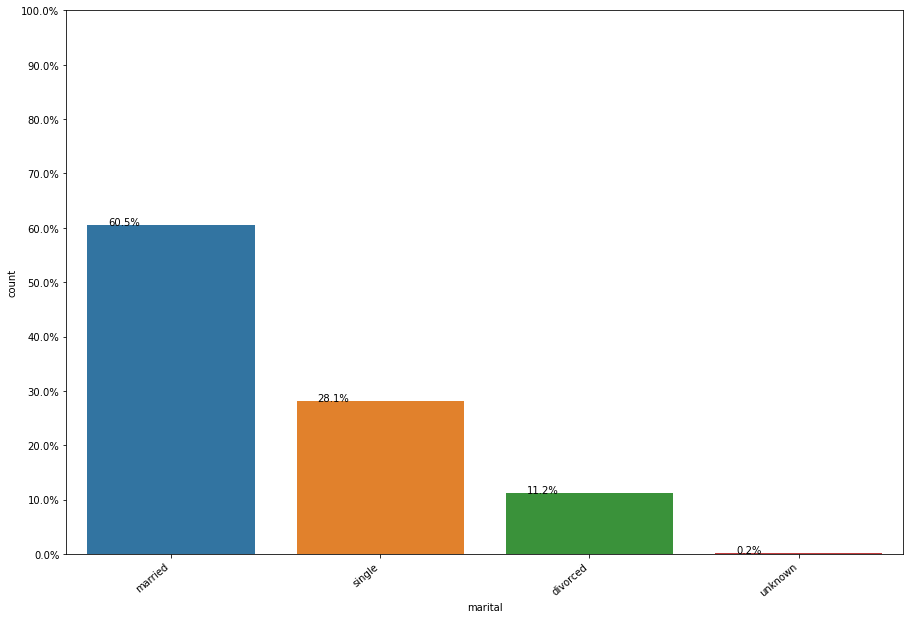

In [105]:
countplot("marital",data)

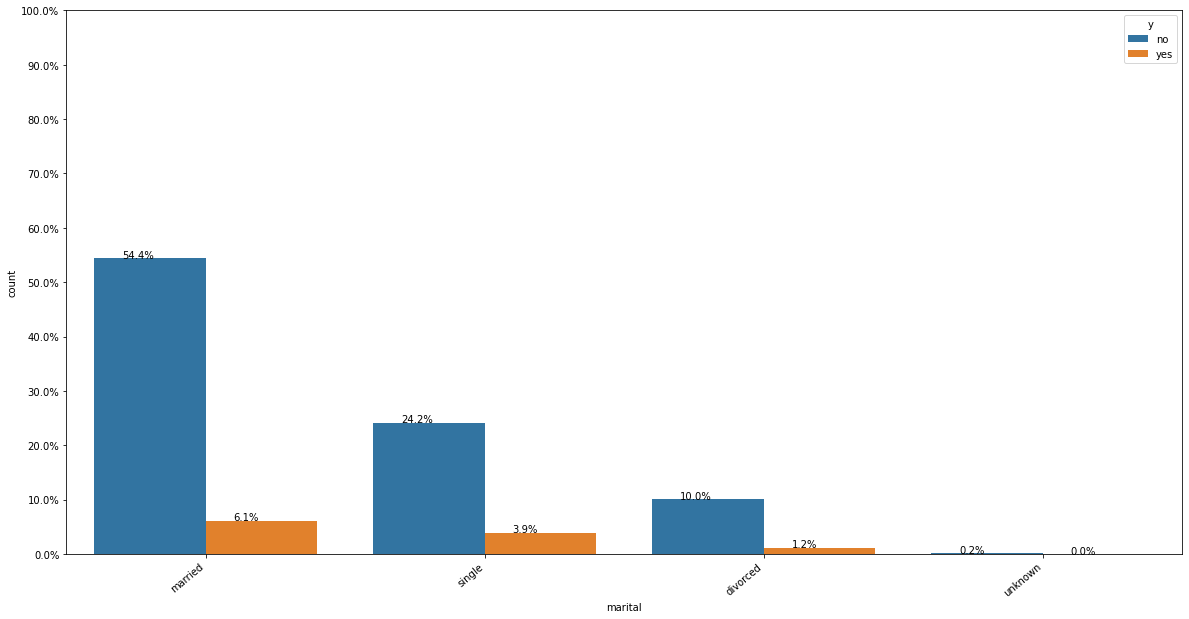

In [106]:
countplot_withY("marital",data)

# Feature : Default
This is a categorical feature which means " Has credit in default", with values "yes", "no" and "unknowm"

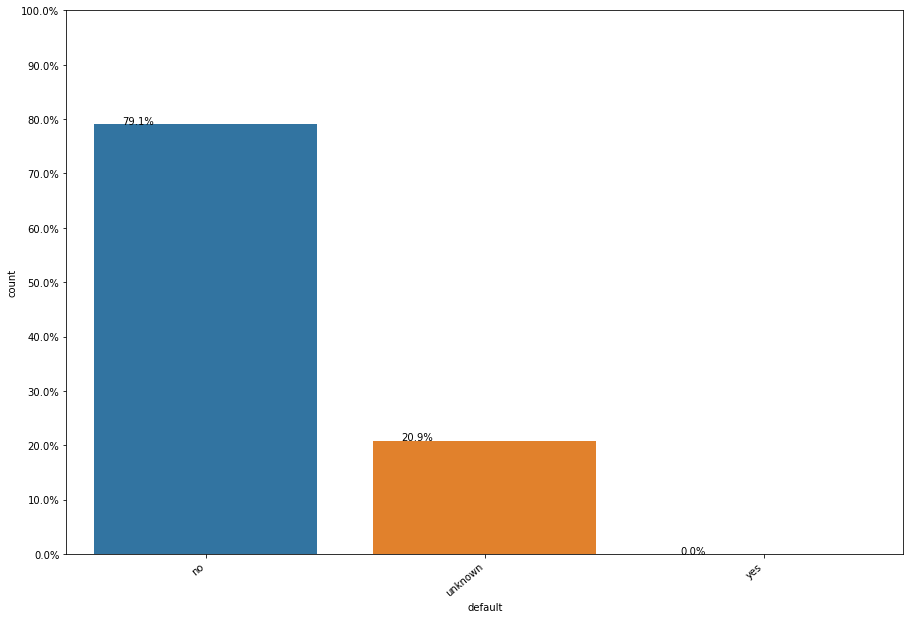

In [107]:
countplot("default",data)

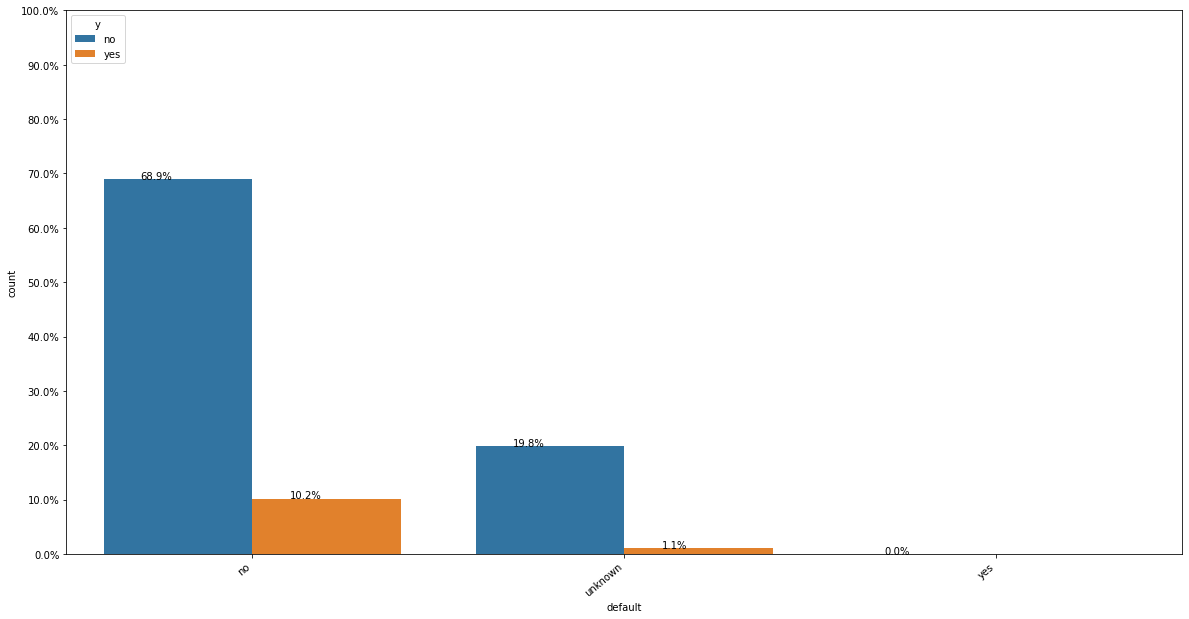

In [108]:
countplot_withY("default",data)


There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

# Feature : Education 

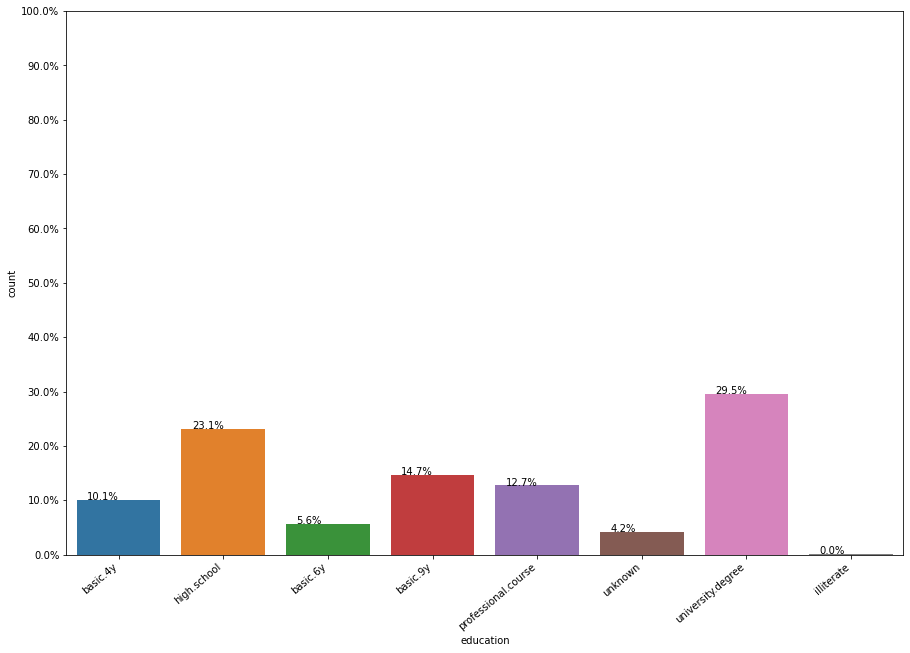

In [109]:
countplot("education",data)

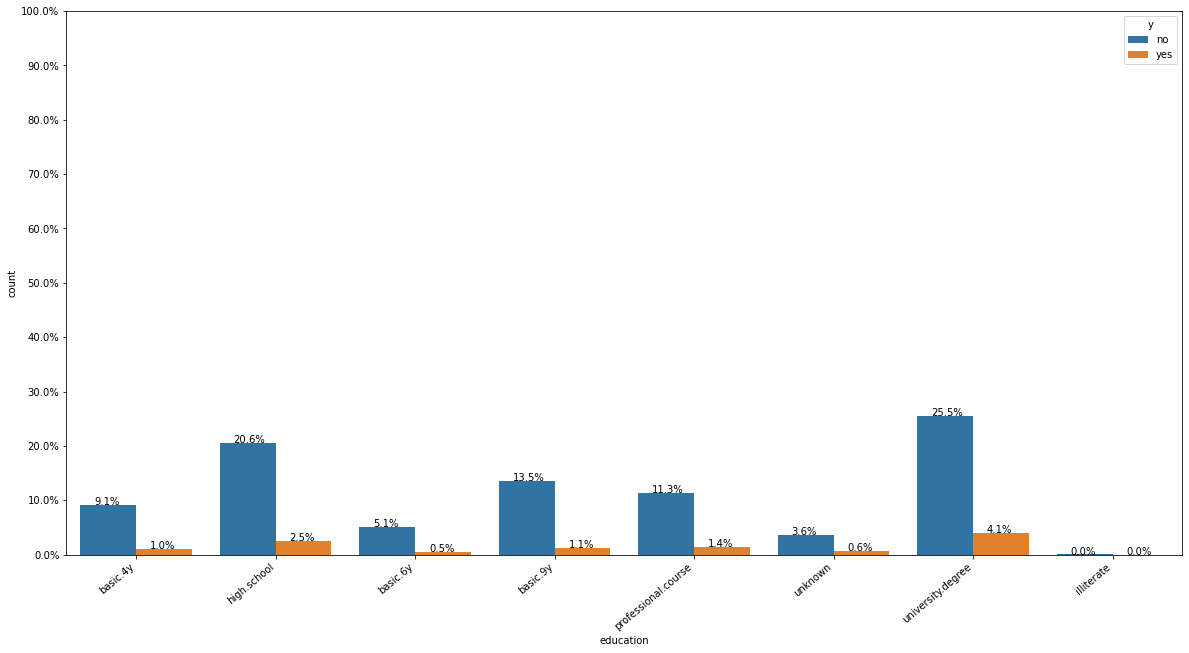

In [110]:
countplot_withY("education",data)

# Feature: Housing

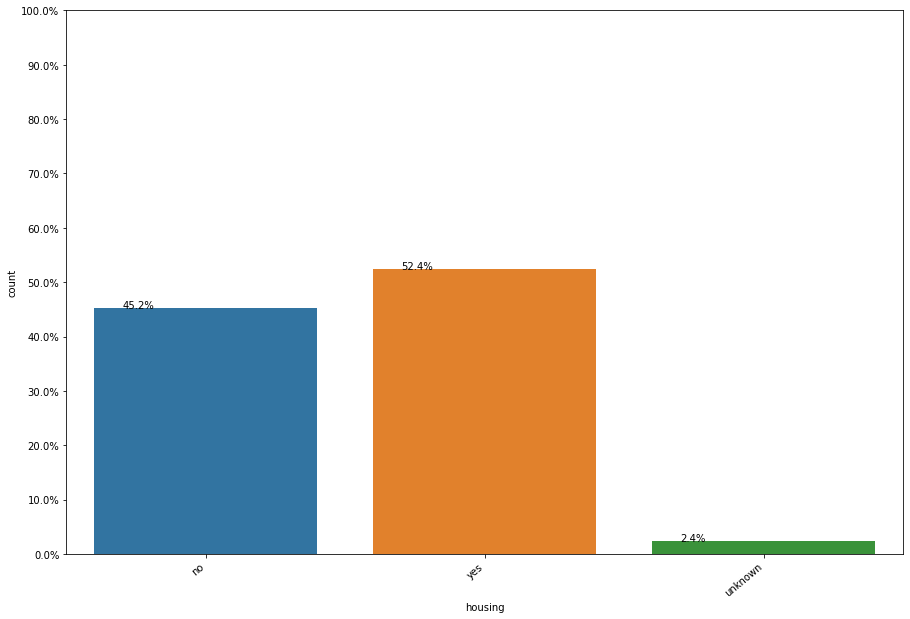

In [111]:
countplot("housing",data)

Majority of the customers already have a housing loan 

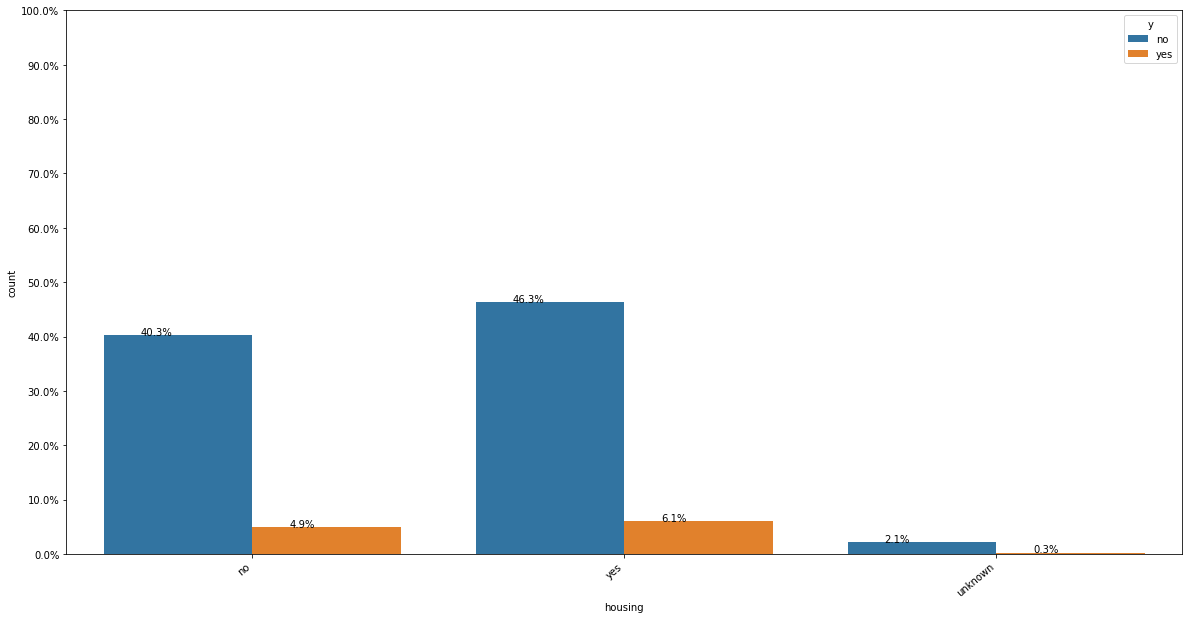

In [112]:
countplot_withY("housing",data)

# Feature: Loan

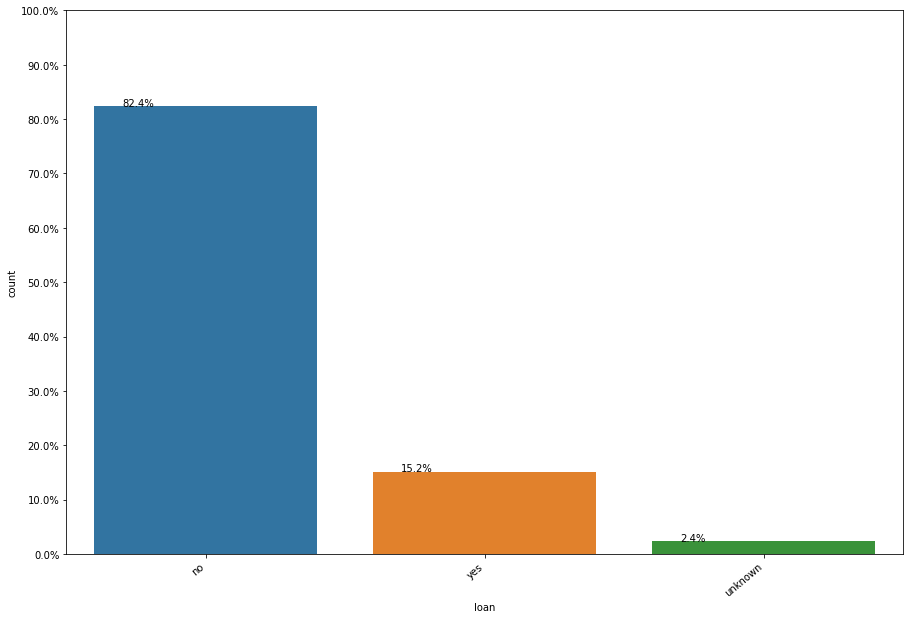

In [113]:
countplot("loan",data)

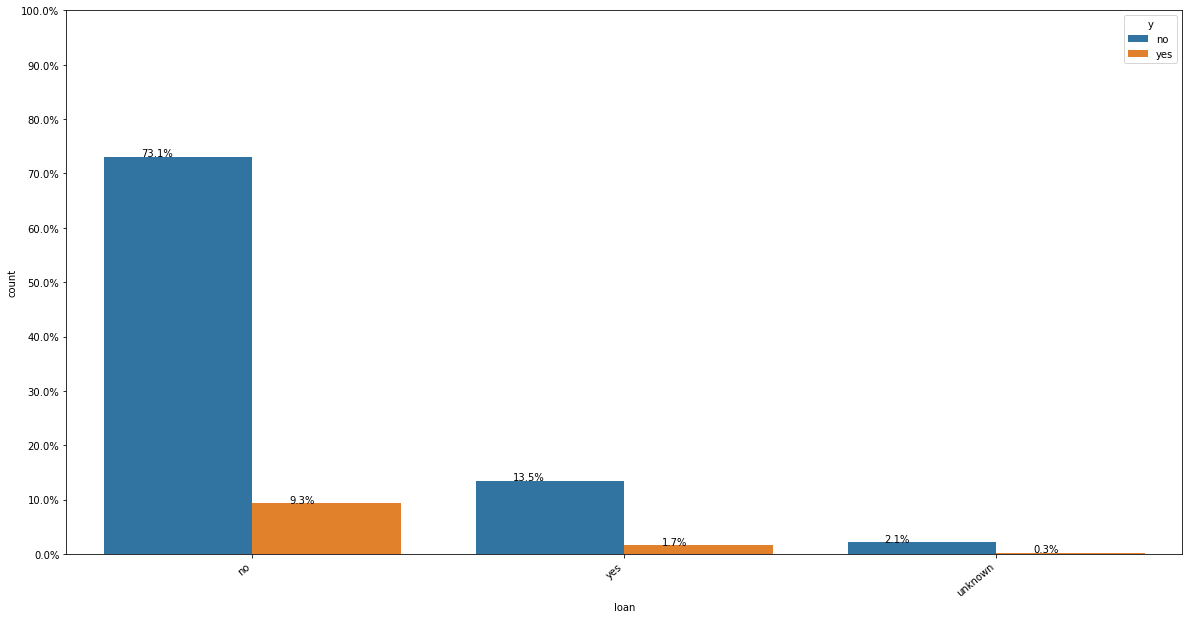

In [114]:
countplot_withY("loan",data)

# Feature: contact

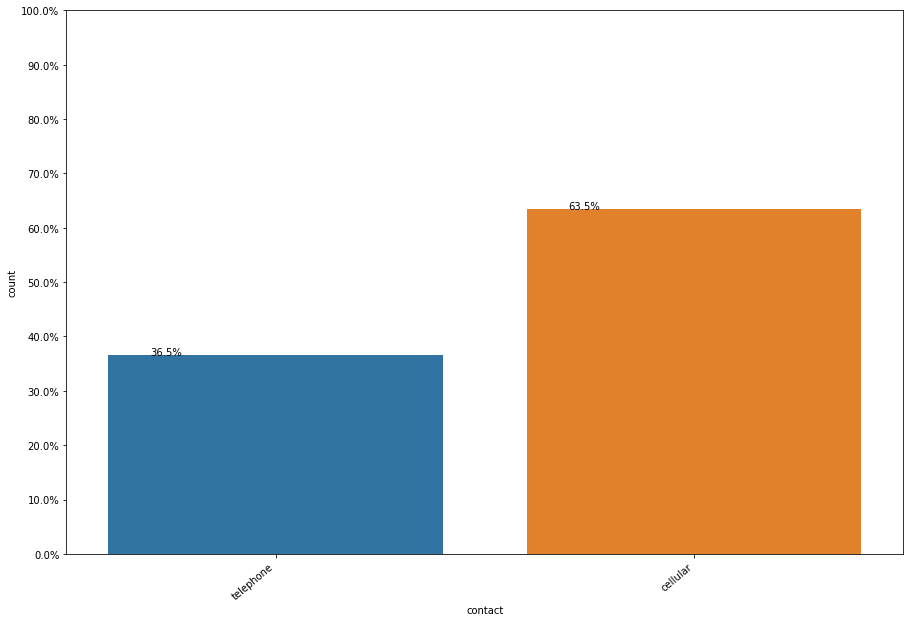

In [115]:
countplot("contact",data)

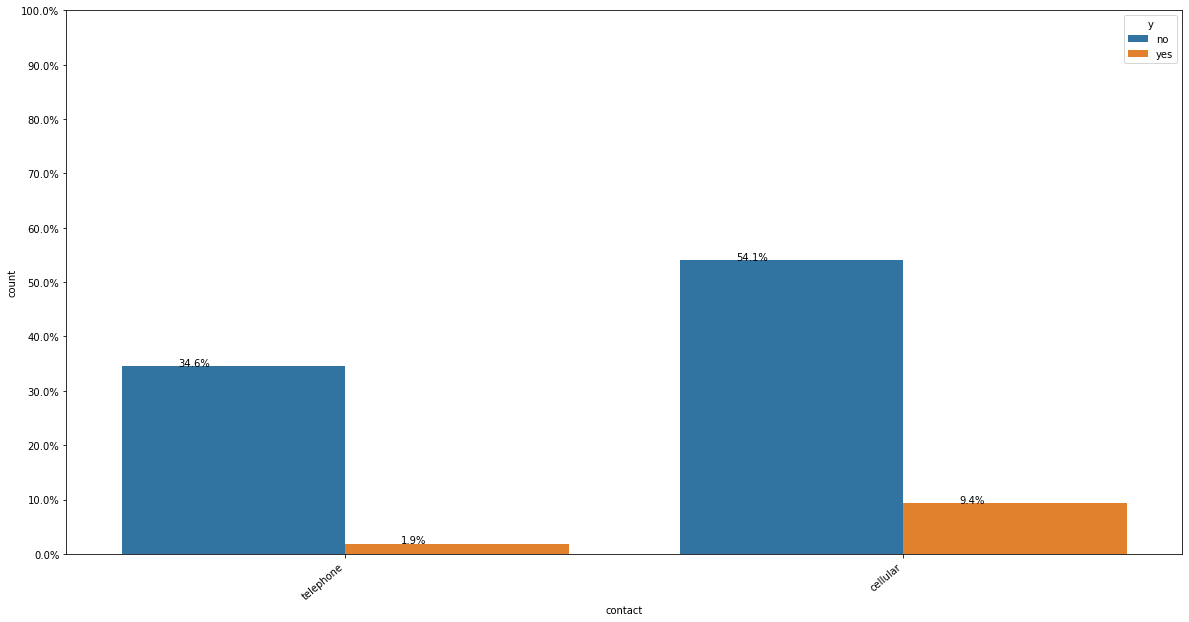

In [116]:
countplot_withY("contact",data)

# Feature: Month

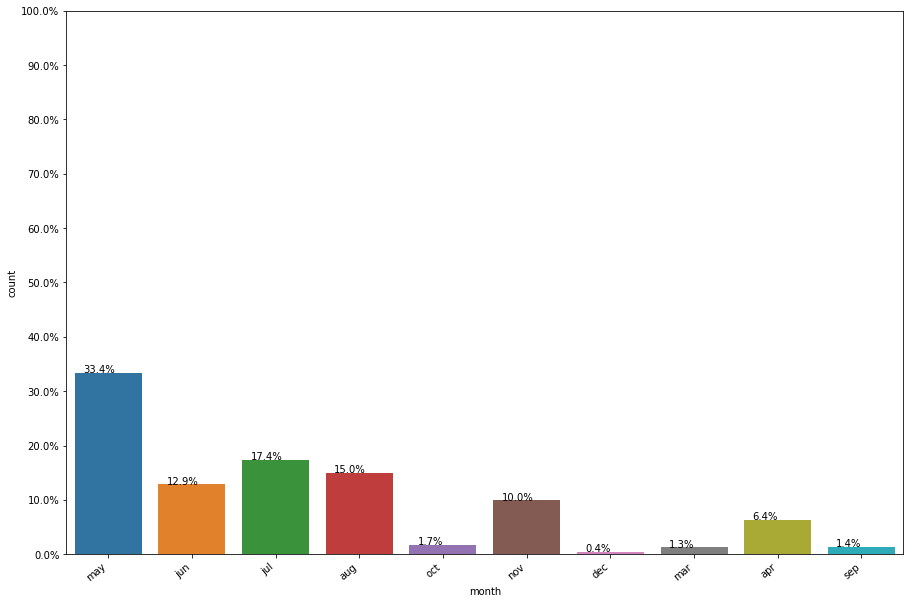

In [117]:
countplot("month",data)

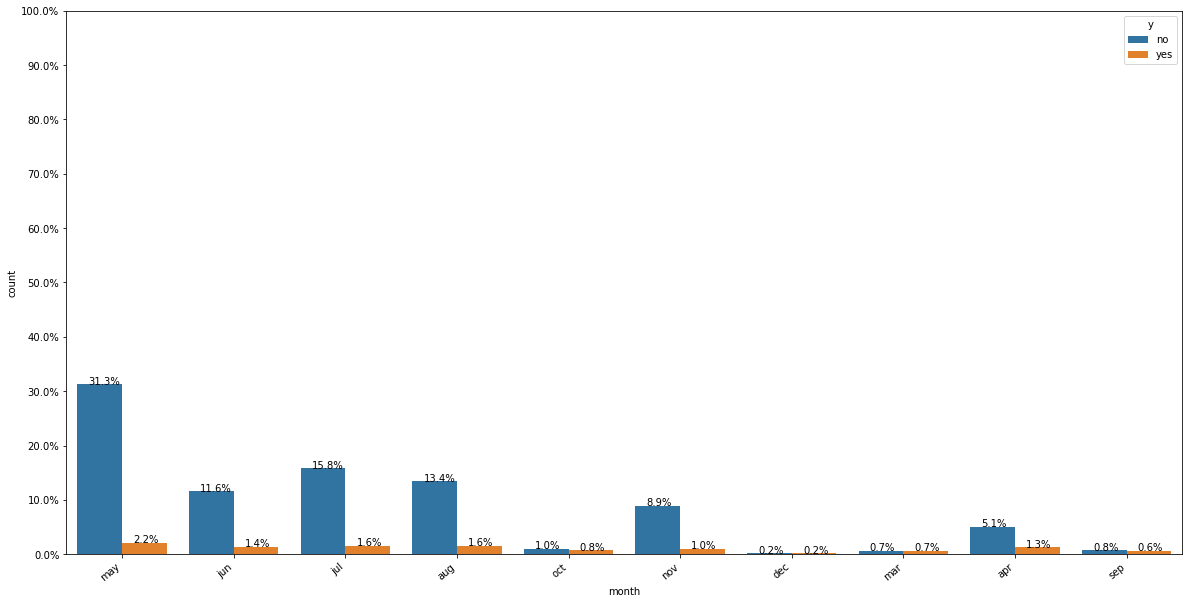

In [118]:
countplot_withY("month",data)

This does not give much insight tot hte problem we are solving

# Feature: day_of_week

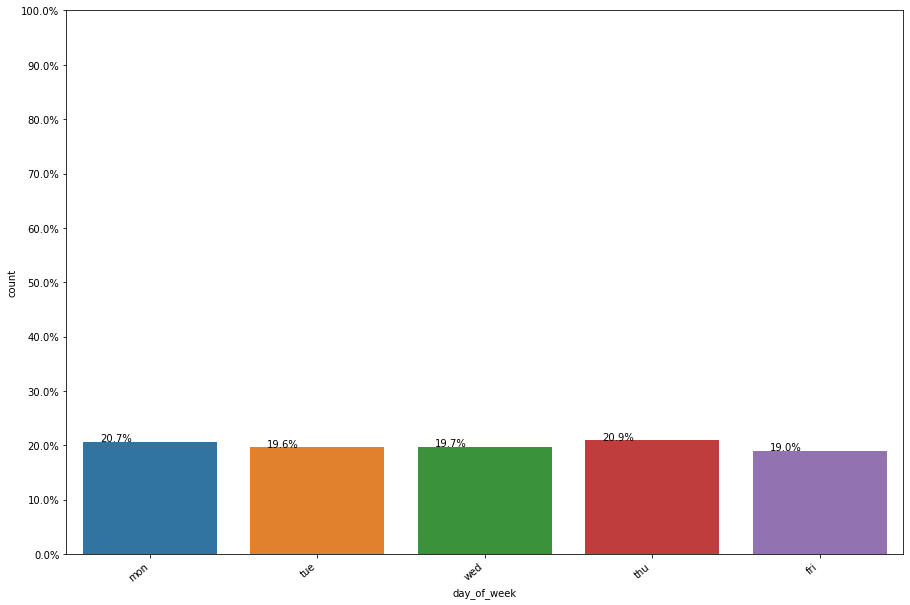

In [119]:
countplot("day_of_week",data)

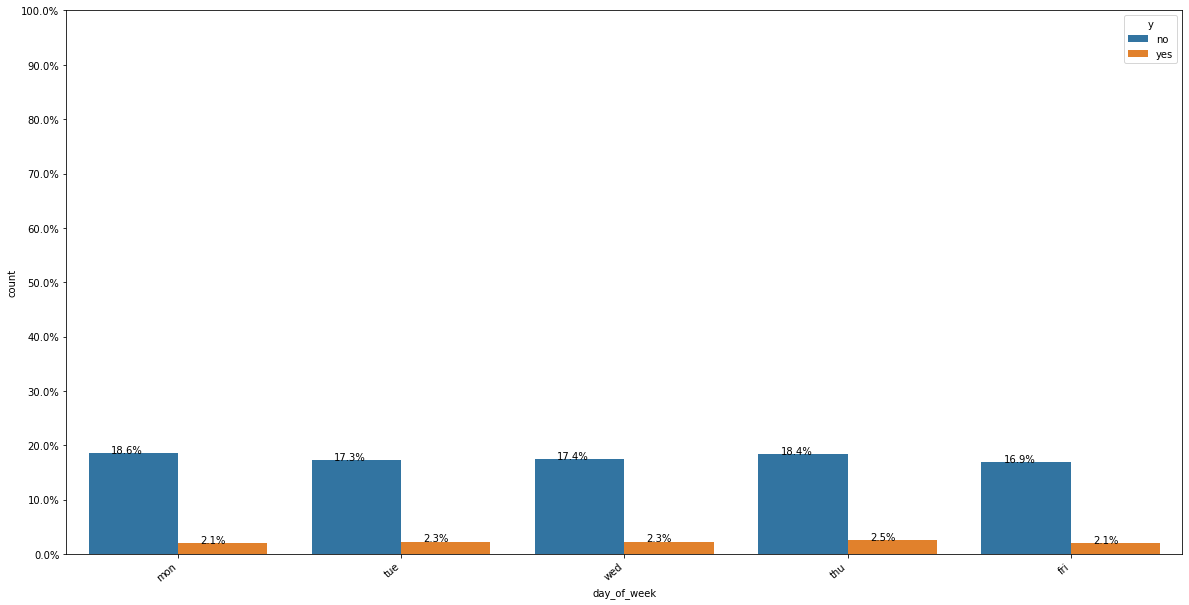

In [120]:
countplot_withY("day_of_week",data)

This feature also does not give any insight as the ratio of yes and no is almost identical

# Feature: poutcome

This feature could be importatn as it gives the outcome of the previous campaign from the bank on the same customer/client

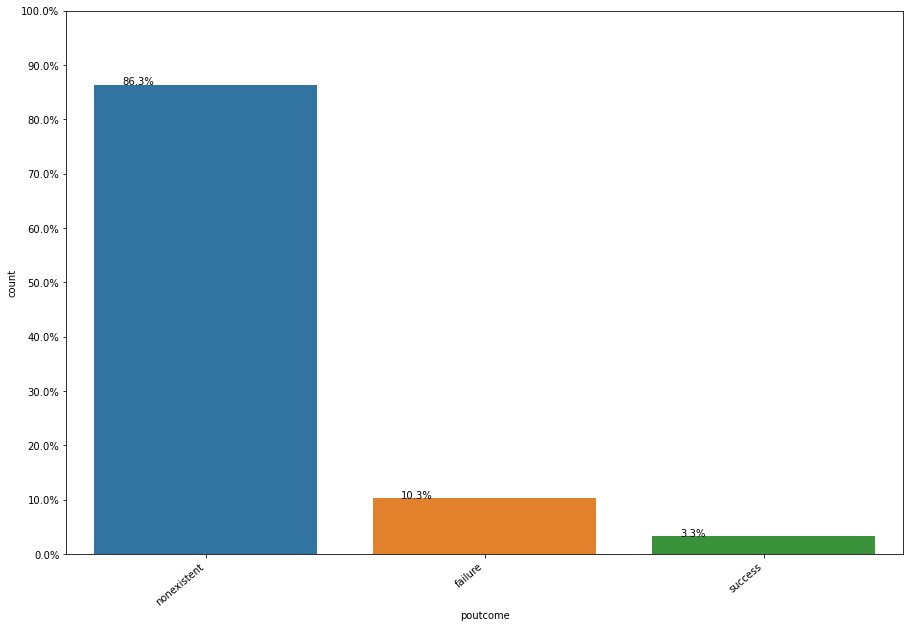

In [121]:
countplot("poutcome",data)

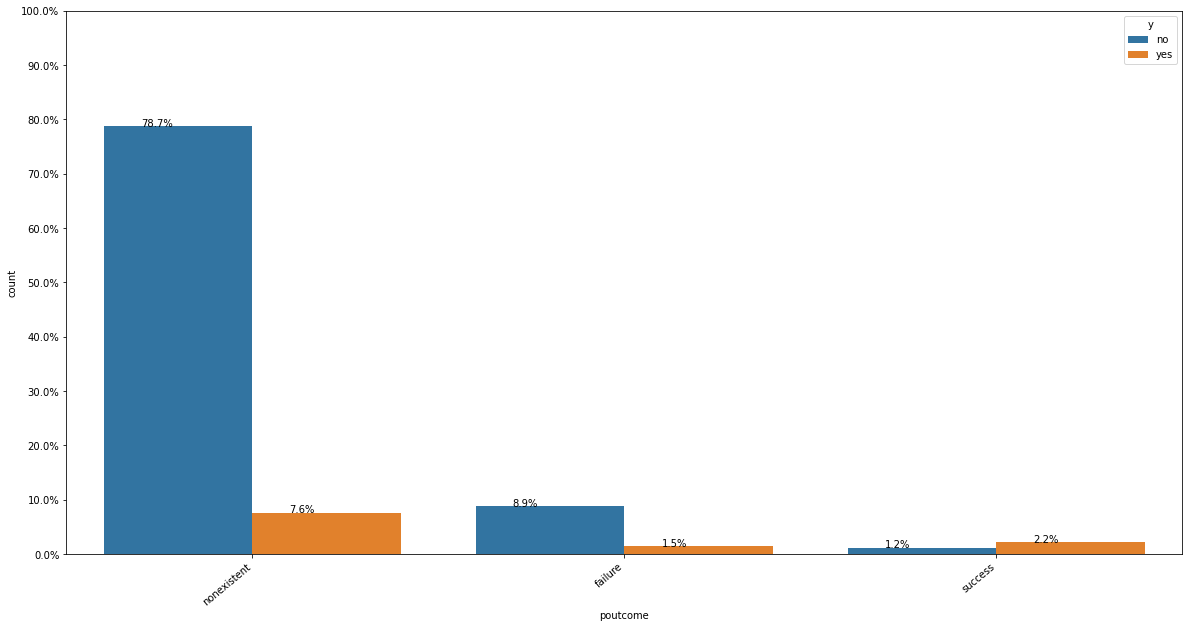

In [122]:
countplot_withY("poutcome",data)

## We have completed the plot of all the categorical features.
## Starting the analysis of numerical features

# Feature : age

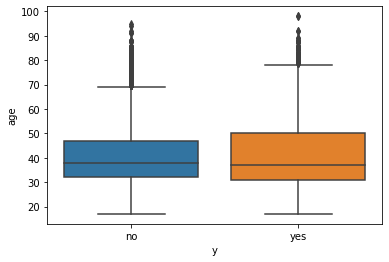

In [123]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

<AxesSubplot:xlabel='age', ylabel='Density'>

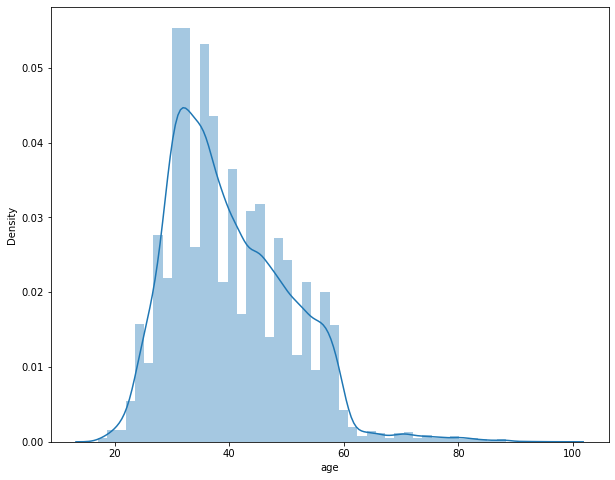

In [124]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])


As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

# Feature: Duration 

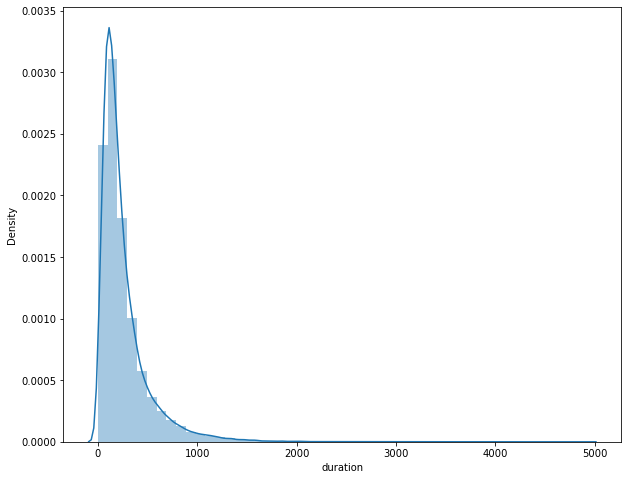

In [125]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

In this distribution most of the values are very low and very few have high values

# Feature: campaign

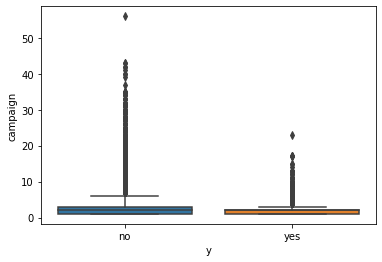

In [126]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

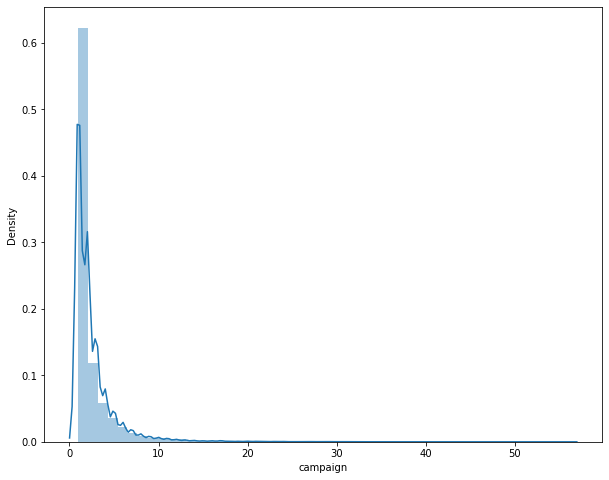

In [127]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

# Feature: pdays

In [128]:
data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [129]:
data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

The number of counts of 999 is very high which indicates that most of the clients were not contacted before

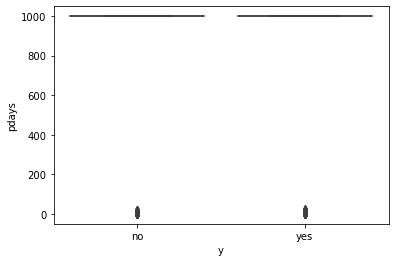

In [130]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

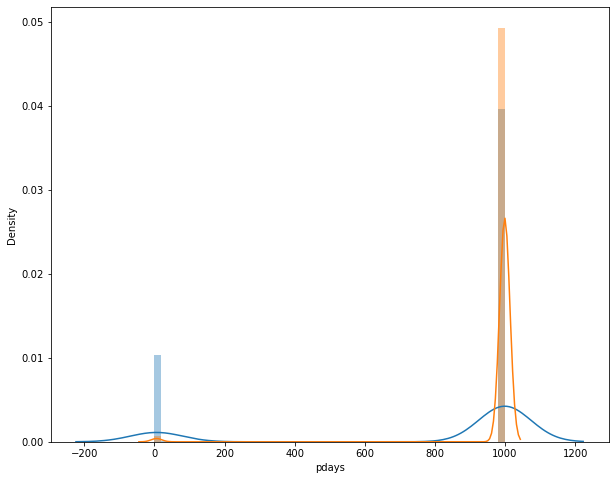

In [131]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["pdays"])
sns.distplot(data[data["y"]=="no"]["pdays"])
plt.show()

# Feature : previous

In [132]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [133]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [134]:
data[data["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [135]:
data[data["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

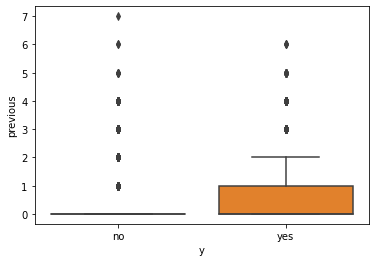

In [136]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="previous")
plt.show()

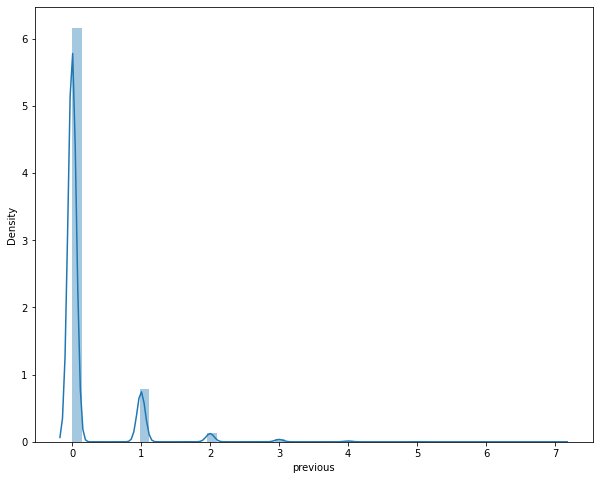

In [137]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

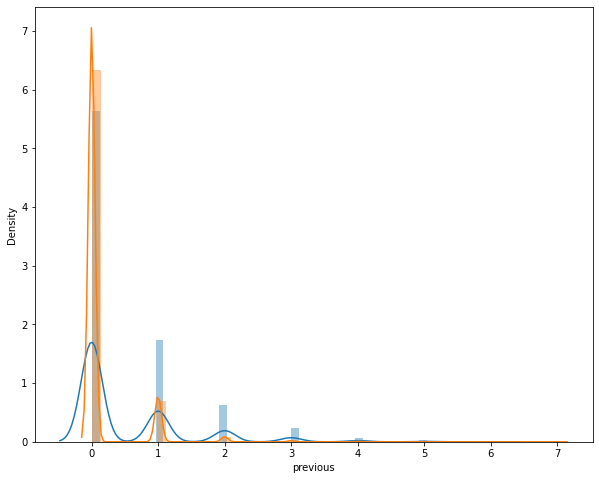

In [138]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["previous"])
sns.distplot(data[data["y"]=="no"]["previous"])
plt.show()

The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable.

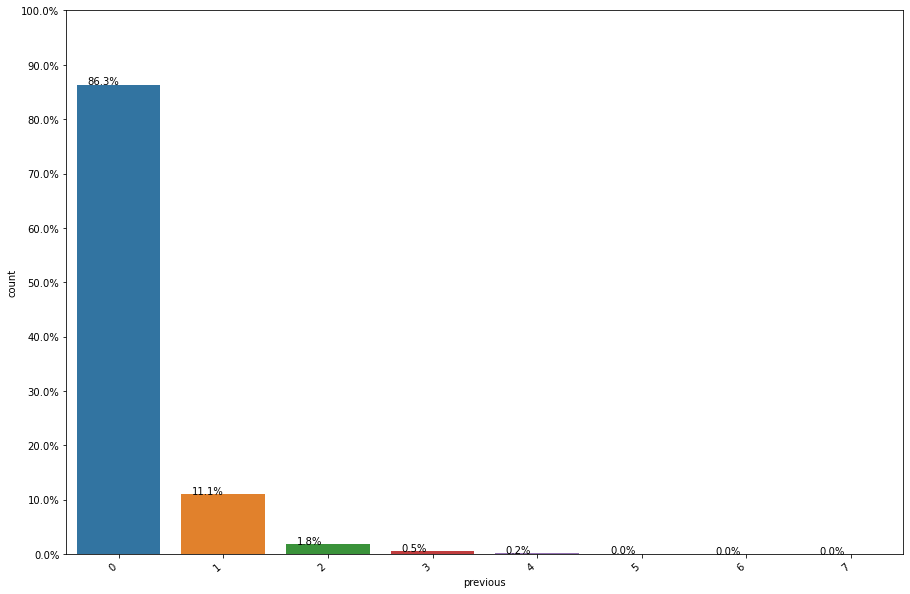

In [139]:
countplot("previous", data)

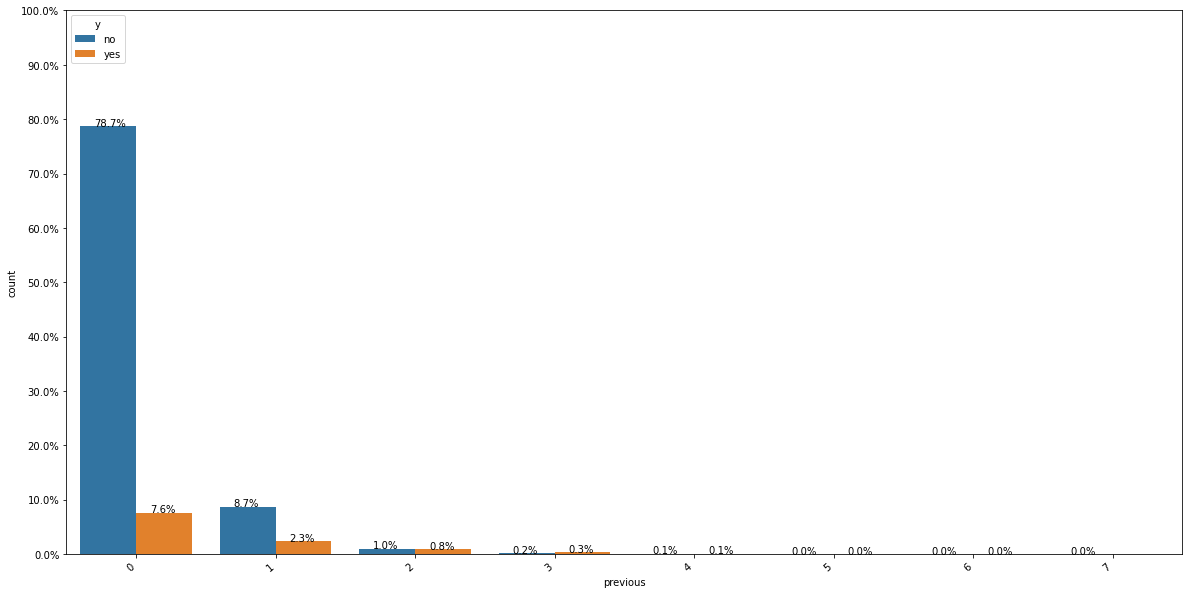

In [140]:
countplot_withY("previous", data)


# Feature: emp.var.rate

In [141]:
data["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

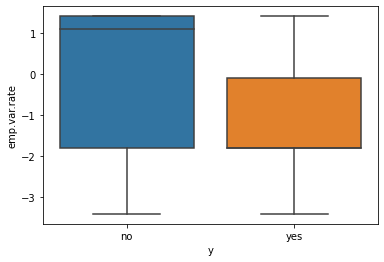

In [142]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate")
plt.show()

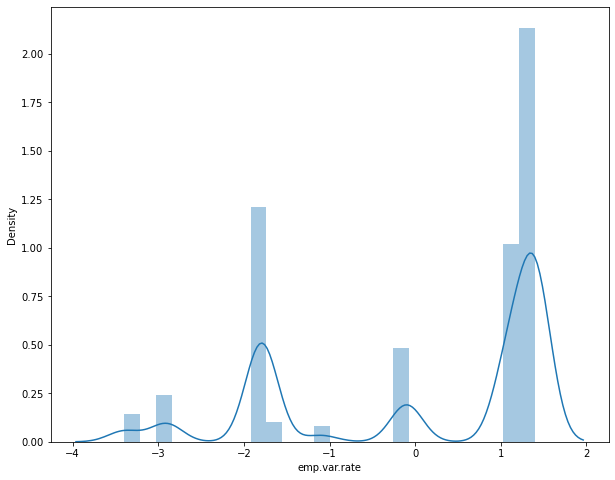

In [143]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["emp.var.rate"])
plt.show()

# Feature: cons.price.idx

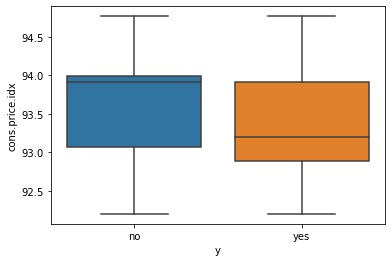

In [144]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx")
plt.show()

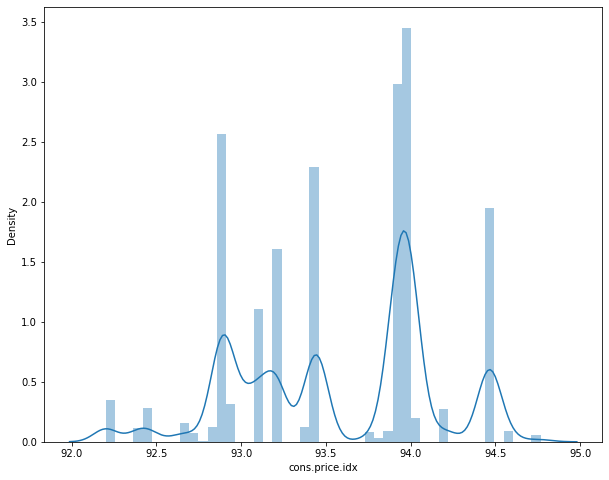

In [145]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.price.idx"])
plt.show()

# Feature: cons.conf.idx

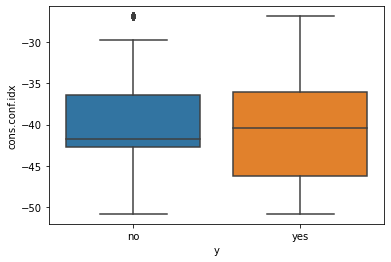

In [146]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.conf.idx")
plt.show()

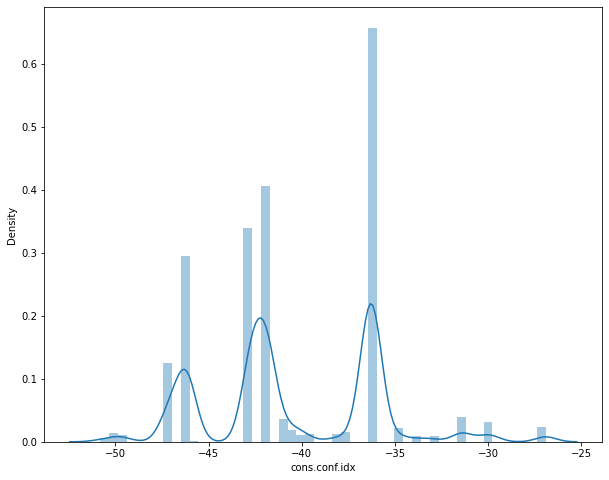

In [147]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.conf.idx"])
plt.show()

# Feature: euribor3m

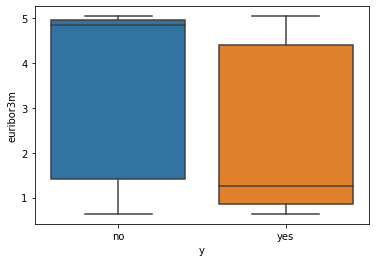

In [148]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="euribor3m")
plt.show()

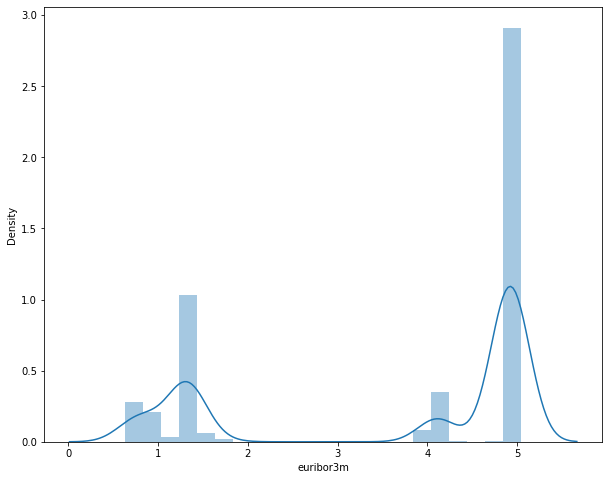

In [149]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["euribor3m"])
plt.show()

# Feature: nr.employed

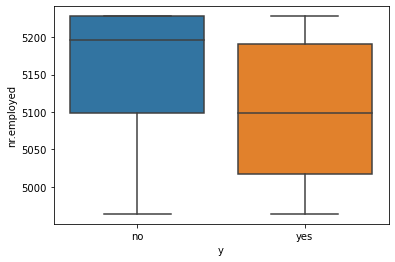

In [150]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="nr.employed")
plt.show()

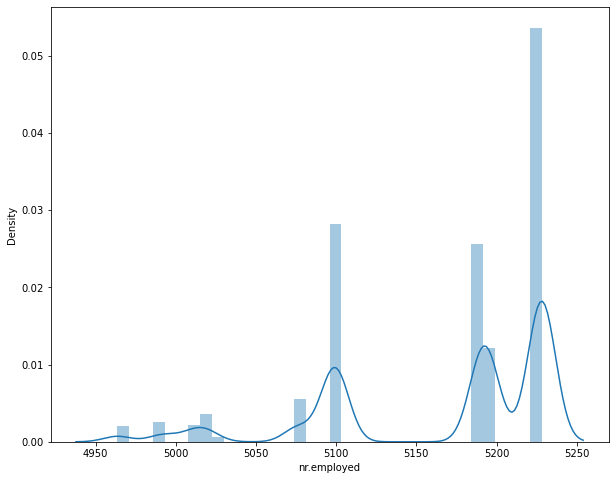

In [151]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["nr.employed"])
plt.show()


### Plotting correlation matrix for numerical features
idea of this plotting : https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff

Text(0.5, 1.05, 'Pearson correlation of Features')

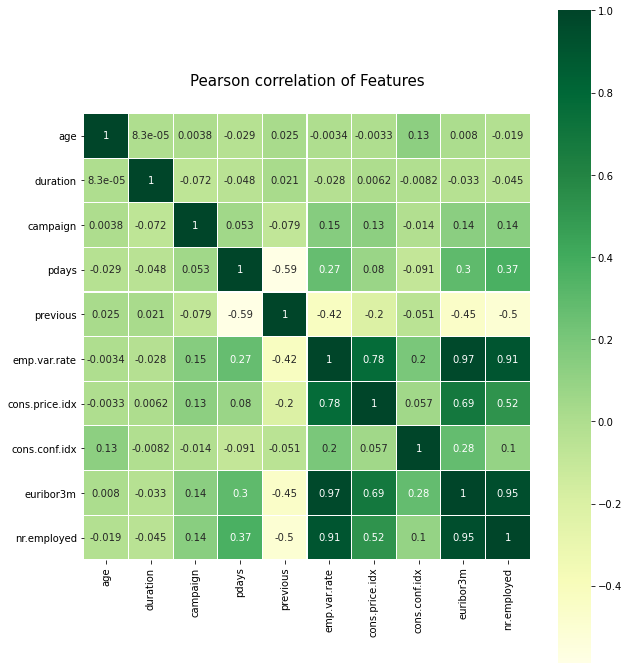

In [152]:
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

##### From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

# Data pre-processing


In [172]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [154]:
data_dupes = data[data.duplicated(keep='last')]
data_dupes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39.0,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36.0,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27.0,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32.0,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55.0,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41.0,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39.0,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
36950,45.0,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
38255,71.0,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [155]:
data_dupes.shape

(9, 21)

so we have 9 rows which are duplicates. we need to drop these before proceeding

In [156]:
data = data.drop_duplicates()
data.shape

data = data.dropna()
data.shape

(32763, 21)

# Seperate independent and target varaiables

In [157]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (32763, 20)
Shape of Y: (32763,)


In [158]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (20968, 20)
X CV: (5242, 20)
X Test: (6553, 20)
Y Train: (20968,)
Y CV: (5242,)
Y Test: (6553,)


replace 'No' with 0 and 'yes' with 1 in target variable coloumn

In [159]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)


# Encoding categorical features
for this case study I will encode categorical features using two methos
- one hot encoding
- response encoding

and compare the results to see which encoding method performed better

## One hot encoding categorical features
The next big step for our data preprocessing is to encode all the categorical features so that we can apply models on the data.

In [160]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [161]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [162]:

from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
        temp_cols = Vectorizer.transform(X_cv[i])
        X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [163]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (20968, 63)
Shape of CV:  (5242, 63)
Shape of test:  (6553, 63)


In [164]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20968 entries, 30049 to 16704
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            20968 non-null  float64
 1   duration                       20968 non-null  int64  
 2   campaign                       20968 non-null  int64  
 3   pdays                          20968 non-null  int64  
 4   previous                       20968 non-null  int64  
 5   emp.var.rate                   20968 non-null  float64
 6   cons.price.idx                 20968 non-null  float64
 7   cons.conf.idx                  20968 non-null  float64
 8   euribor3m                      20968 non-null  float64
 9   nr.employed                    20968 non-null  float64
 10  job_admin.                     20968 non-null  int64  
 11  job_blue-collar                20968 non-null  int64  
 12  job_entrepreneur               20968 non-n

In [165]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

# Benchmark model
We will create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data in two ways.

- Use "Duration" feature to see how the model performs with this feature. It will probably give very high AUC as the duration feature is very correlated with the target variable. But obviously we can't use the Duration feature for actual modelling.
- Next remove the "Duration" feature, and apply the same model to check how the model performs.

## Visualize data with T-SNE plot
We will plot the t-sne plot for the dataset with "Duration" feature.

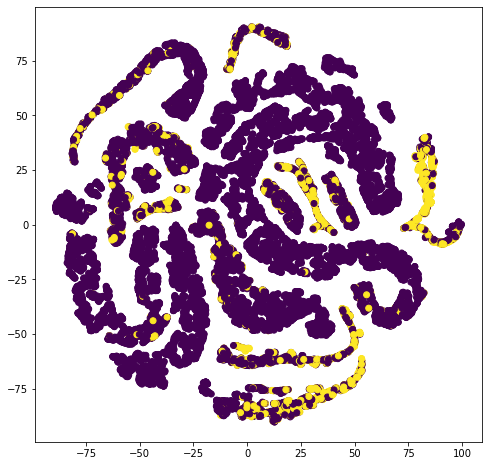

In [77]:
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

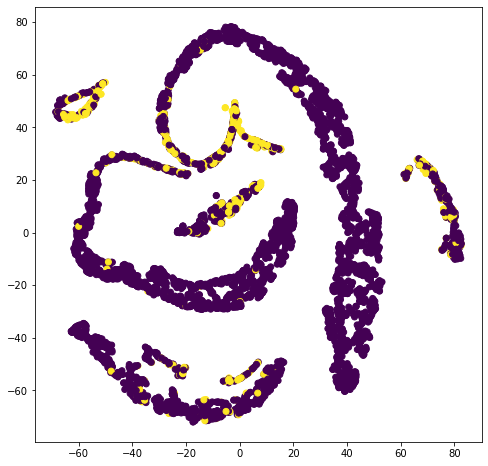

In [78]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()


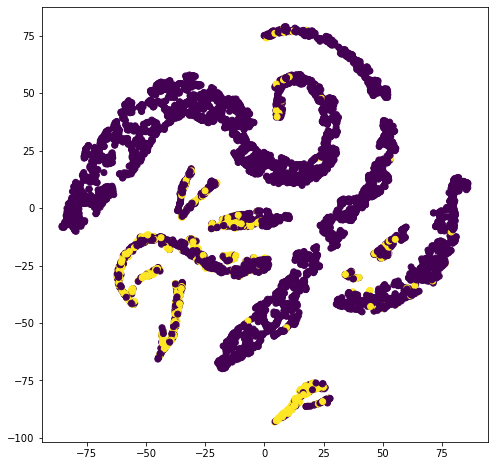

In [79]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

## Modelling with "Duration" Column
Seeing how the model performs with the "duration" feature. It is to be noted again that the duration feature can not be included in the final model as it is highly correlated with the target variable, and to build any reasonable predictive model, we cannot include this feature.

In [166]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score with duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration column:  0.9230482084460135


As we can see that, with duration column the AUC score is very good, 0.933. Which is a lot better than what the original paper achieved (AUC of 0.8). Now let's see how the same model does without the duration feature.

## Removing "Duration" feature
**duration**: last contact duration, in seconds (numeric).

**Important note**: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [167]:
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (20968, 62)
The shape of the cv dataset:  (5242, 62)
The shape of the test dataset:  (6553, 62)


In [168]:
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

KeyboardInterrupt: 

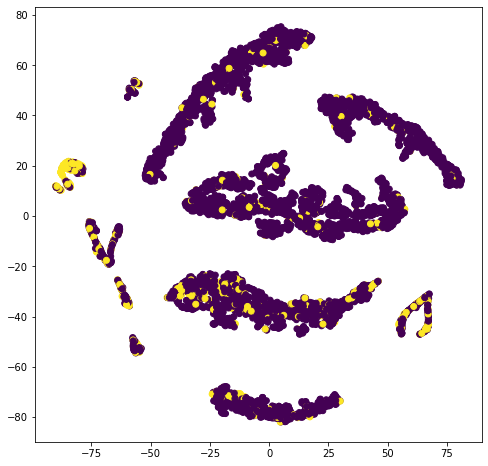

In [83]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

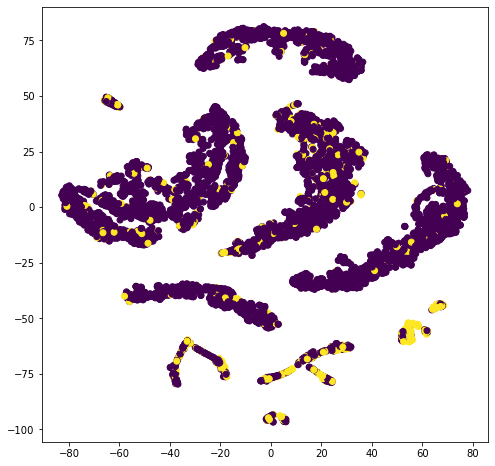

In [84]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()


# Modelling Without "Duration" Column
Here we will just implement a LogisticRegression model without any hyperparameter tuning just to check how much the performance changed once we removed the "Duration" column from the dataset.

We will use two variations of the LogisticRegression model:

- With class balancing
- Without class balancing


This is to check the model is performing in both the scenarios.

In [169]:
# without "duration" column
# X_train = X_train.drop("duration", axis=1)
# X_test = X_test.drop("duration", axis=1)

# print(X_train.shape)
# print(X_test.shape)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.7561328807966329


In [170]:
# without "duration" column and without class balancing
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column and class balancing:  0.758180002351585


# KNN

AUC for k =  1 is 0.6708890735188463
AUC for k =  3 is 0.7198371753513899
AUC for k =  5 is 0.73989452010259
AUC for k =  7 is 0.747052032443789
AUC for k =  9 is 0.7547882465882685
AUC for k =  11 is 0.7579787690144225
AUC for k =  13 is 0.7602459592128343
AUC for k =  15 is 0.7586236967806884


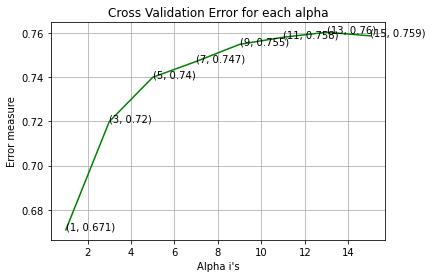

For values of best alpha =  13 The train AUC is: 0.8757806612939601
For values of best alpha =  13 The cross validation AUC is: 0.7602459592128343
For values of best alpha =  13 The test AUC is: 0.7786362527755741


In [87]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

# Logisitic Regression

AUC for k =  1e-05 is 0.7391873800680651
AUC for k =  0.0001 is 0.7579656332862271
AUC for k =  0.001 is 0.7649636924823863
AUC for k =  0.01 is 0.7676685578466454
AUC for k =  0.1 is 0.7680775898274002
AUC for k =  1 is 0.7667300830433439
AUC for k =  10 is 0.7714140647890603
AUC for k =  100 is 0.7632097078869465
AUC for k =  1000 is 0.765190283793759


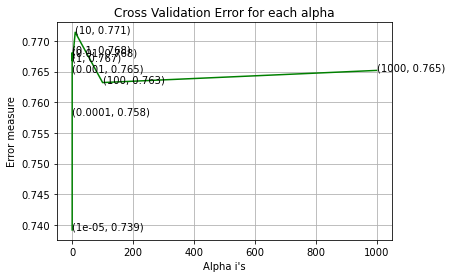

For values of best alpha =  10 The train AUC is: 0.7894632336688604
For values of best alpha =  10 The cross validation AUC is: 0.7714140647890603
For values of best alpha =  10 The test AUC is: 0.7892595601212724


In [88]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

# Linear SVM

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.7399583743368737
AUC for alpha =  0.01 is 0.7449138277986307
AUC for alpha =  0.1 is 0.7443187063351063
AUC for alpha =  1 is 0.7336028711782785
AUC for alpha =  10 is 0.7066439783450223
AUC for alpha =  100 is 0.5804913638060335
AUC for alpha =  1000 is 0.4400003721789655


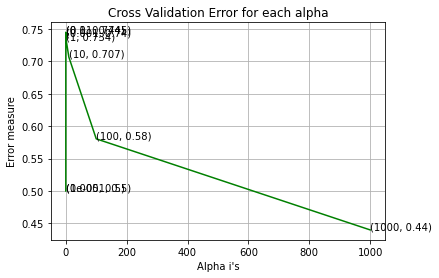

For values of best alpha =  0.01 The train AUC is: 0.7597600448594178
For values of best alpha =  0.01 The cross validation AUC is: 0.7480707811416188
For values of best alpha =  0.01 The test AUC is: 0.7631196745998113


In [89]:

%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

# Random Forests

AUC for number of estimators =  10 is 0.7590564460484628
AUC for number of estimators =  50 is 0.7684899057402037
AUC for number of estimators =  100 is 0.7645710801618759
AUC for number of estimators =  500 is 0.7646502594123877
AUC for number of estimators =  1000 is 0.7653661565990432
AUC for number of estimators =  2000 is 0.765538927912948
AUC for number of estimators =  3000 is 0.7656336146203574


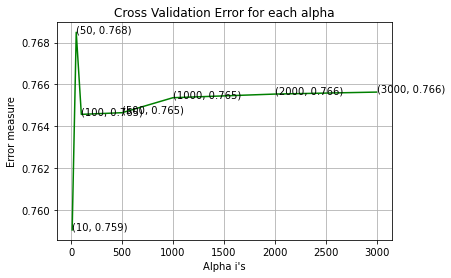

For values of best alpha =  50 The train AUC is: 0.9997025645121285
For values of best alpha =  50 The cross validation AUC is: 0.7684899057402037
For values of best alpha =  50 The test AUC is: 0.7799645938631643


In [90]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

# XGBoost

In [173]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000]
cv_auc_array=[]
for i in alpha:
    x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

XGBoostError: [17:56:51] /Users/travis/build/dmlc/xgboost/src/gbm/../common/common.h:157: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000133f32de4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000133fca742 xgboost::gbm::GBTree::ConfigureUpdaters() + 514
  [bt] (2) 3   libxgboost.dylib                    0x0000000133fca1a5 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1141
  [bt] (3) 4   libxgboost.dylib                    0x0000000133fe464b xgboost::LearnerConfiguration::Configure() + 1499
  [bt] (4) 5   libxgboost.dylib                    0x0000000133fe4a88 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 120
  [bt] (5) 6   libxgboost.dylib                    0x0000000133f29a49 XGBoosterUpdateOneIter + 137
  [bt] (6) 7   libffi.7.dylib                      0x000000010ce67ead ffi_call_unix64 + 85
  [bt] (7) 8   ???                                 0x00000003075702a0 0x0 + 13008044704



# Logistic Regression with Hyper parameter Tuning

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Train:", y_test.shape)

X Train: (26210, 20)
X Test: (6553, 20)
Y Train: (26210,)
Y Train: (6553,)


In [175]:
OneHotEncoder(categorical_cols, X_train, X_test)
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26210, 63)
Shape of test:  (6553, 63)


In [176]:
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid_clf = GridSearchCV(cv=None,
             estimator=logisticR,
             param_grid=param_grid)

In [177]:
grid_clf.fit(X_train, y_train)
print (grid_clf.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [178]:
logisticR=LogisticRegression(penalty='l2',C=0.001,class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

The train AUC is: 0.9261272583212129
The test AUC is: 0.9308503526985722


From the above model analysis we can see that, the most relevent features are the following:

- nr.employed
- emp.var.rate
- poutcome_success
- euribor3m
- etc.

# Response Coding

In [179]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (20968, 20)
X CV: (5242, 20)
X Test: (6553, 20)
Y Train: (20968,)
Y CV: (5242,)
Y Test: (6553,)


In [180]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [181]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25275,44.0,services,married,high.school,unknown,no,no,cellular,nov,tue,43,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8
10828,26.0,blue-collar,single,unknown,no,yes,yes,telephone,jun,wed,203,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
11472,40.0,management,married,university.degree,no,no,no,telephone,jun,fri,64,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
14776,31.0,blue-collar,single,basic.9y,no,no,no,telephone,jul,wed,138,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1
28202,47.0,blue-collar,single,basic.4y,unknown,no,no,cellular,apr,tue,369,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1


In [182]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [183]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [184]:
# get_fea_dict: Get categorical data Feature Dict
def get_fea_dict(alpha, feature, train_df, train_df_y):
    # value_count: it contains a dict like
    value_count = train_df[feature].value_counts()
    
    # feat_dict : Categorical feature Dict, which contains the probability array for each categorical variable
    feat_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of the particular 
        # categorical feature belongs to particular class
        # vec is 2 diamensional vector
        vec = []
        for k in range(0, 2):
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df_y==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))

        # we are adding the categorical feature to the dict as key and vec as value
        feat_dict[i]=vec
    return feat_dict

# Get Response coded feature
def get_response_feature(alpha, feature, train_df, train_df_y):

    feat_dict = get_fea_dict(alpha, feature, train_df, train_df_y)
    # value_count is similar in get_fea_dict
    value_count = train_df[feature].value_counts()
    
    # res_fea: response coded feature, it will contain the response coded feature for each feature value in the data
    res_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to res_fea
    # if not we will add [1/2, 1/2] to res_fea
    for index, row in train_df.iterrows():
        if row[feature] in dict(value_count).keys():
            res_fea.append(feat_dict[row[feature]])
        else:
            res_fea.append([1/2, 1/2])
    return res_fea

In [187]:
def ResponseEncoder(categorical_cols, x_df, y_df):
    print("Encoding Train dataset")
    print("Shape of the train dataset before encoding: ", X_train.shape)
    for i in (categorical_cols):
        temp_response_coded_feature = np.array(get_response_feature(alpha=1, feature=i, train_df=x_df, train_df_y=y_df))
        df_response = pd.DataFrame(temp_response_coded_feature, columns=[i+"_0", i+"_1"])
        x_df = pd.concat([x_df, df_response], axis=1)
  
  # Remove the categorical features as the response coded features are added
    x_df = x_df.drop(categorical_cols, axis=1)
    return x_df

In [188]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train = X_train.reset_index().drop("index",axis=1)
X_test = X_test.reset_index().drop("index",axis=1)
X_cv = X_cv.reset_index().drop("index",axis=1)

In [189]:
X_train = ResponseEncoder(categorical_cols, X_train, y_train)
print("Shape of the train dataset after encoding: ", X_train.shape)

X_cv = ResponseEncoder(categorical_cols, X_cv, y_cv)
print("Shape of the cv dataset after encoding: ", X_cv.shape)

X_test = ResponseEncoder(categorical_cols, X_test, y_test)
print("Shape of the test dataset after encoding: ", X_test.shape)


Encoding Train dataset
Shape of the train dataset before encoding:  (20968, 20)
Shape of the train dataset after encoding:  (20968, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (20968, 30)
Shape of the cv dataset after encoding:  (5242, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (20968, 30)
Shape of the test dataset after encoding:  (6553, 30)


In [190]:
# Remove duration feature
X_train = X_train.drop("duration", axis=1)
X_cv = X_cv.drop("duration", axis=1)
X_test = X_test.drop("duration", axis=1)

In [191]:
X_train.to_csv("Response_coded_features_train.csv")
X_cv.to_csv("Response_coded_features_cv.csv")
X_test.to_csv("Response_coded_features_test.csv")

# KNN

AUC for k =  1 is 0.6899802666792145
AUC for k =  3 is 0.752588160301617
AUC for k =  5 is 0.7718371545198423
AUC for k =  7 is 0.7805537460959786
AUC for k =  9 is 0.7814571484028068
AUC for k =  11 is 0.7852893019521577
AUC for k =  13 is 0.7869922566566873
AUC for k =  15 is 0.7907179870248269


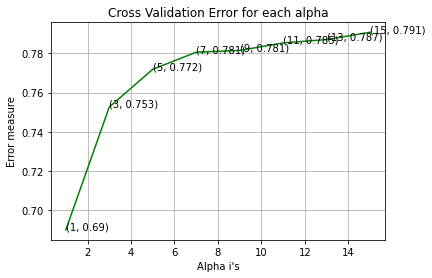

For values of best alpha =  15 The train AUC is: 0.8610894470740104
For values of best alpha =  15 The cross validation AUC is: 0.7907179870248269
For values of best alpha =  15 The test AUC is: 0.7638974503861236


In [192]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))


# Logistic Regression

AUC for k =  1e-05 is 0.7645593896492703
AUC for k =  0.0001 is 0.7700665595205185
AUC for k =  0.001 is 0.7663599448878642
AUC for k =  0.01 is 0.7687983039931301
AUC for k =  0.1 is 0.7683799634742408
AUC for k =  1 is 0.7669565764011834
AUC for k =  10 is 0.7662805410635407
AUC for k =  100 is 0.7635991915514331
AUC for k =  1000 is 0.765642001976273


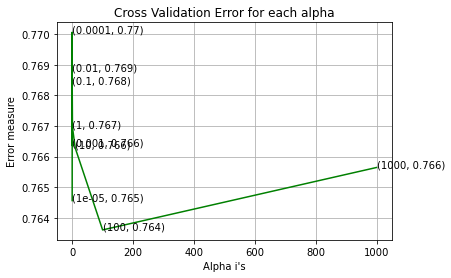

For values of best alpha =  0.0001 The train AUC is: 0.7534636992233001
For values of best alpha =  0.0001 The cross validation AUC is: 0.7700665595205185
For values of best alpha =  0.0001 The test AUC is: 0.7604038838756566


In [193]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))


# Linear SVM

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.7664959606980478
AUC for alpha =  0.01 is 0.7687222086614868
AUC for alpha =  0.1 is 0.7652718184063946
AUC for alpha =  1 is 0.7630091770234741
AUC for alpha =  10 is 0.6970433471358747
AUC for alpha =  100 is 0.556530927789574
AUC for alpha =  1000 is 0.4627722889475758


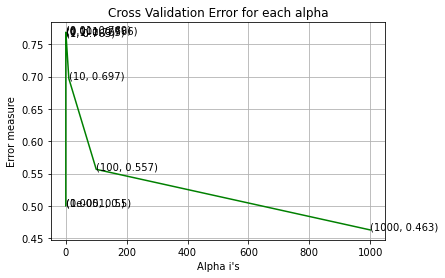

For values of best alpha =  0.01 The train AUC is: 0.7454461039504338
For values of best alpha =  0.01 The cross validation AUC is: 0.7673223486474882
For values of best alpha =  0.01 The test AUC is: 0.74556799826487


In [194]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

# Random Forests

AUC for number of estimators =  10 is 0.5926980831328632
AUC for number of estimators =  50 is 0.7074693265967522
AUC for number of estimators =  100 is 0.7659461994976974
AUC for number of estimators =  500 is 0.785743300669933
AUC for number of estimators =  1000 is 0.7891278886817201
AUC for number of estimators =  2000 is 0.7904549618567555
AUC for number of estimators =  3000 is 0.7925558547086469


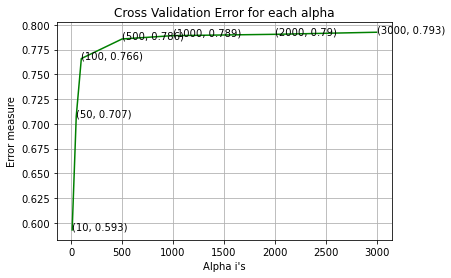

In [ ]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

# Linear Regression with HyperParameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Train:", y_test.shape)

In [ ]:
X_train = ResponseEncoder(categorical_cols, X_train, X_test)
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)